### E-commerce Analysis

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



 #### 1. Remove missing data
 
Remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df= pd.read_csv('The E-commerce Dataset.csv')
pd.read_csv('The E-commerce Dataset.csv')

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [3]:
# Number of Null values in each column 
df.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [4]:
print("length of data BEFORE removing missing values and none review:", len(df))

length of data BEFORE removing missing values and none review: 20000


In [5]:
# Remove gender/rating/helpfulness is missing
temp_df = df.dropna()
temp_df.shape


(19934, 11)

In [6]:
# Remove review is 'none'
clean_df = temp_df.loc[temp_df["review"] != 'none']
clean_df.shape

(19916, 11)

In [7]:
print("lenght of data  AFTER removing missing values and none review:", len(clean_df))

lenght of data  AFTER removing missing values and none review: 19916


In [8]:
# Display the cleaned dataframe
clean_df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [9]:
# Check the number of Null values in each column
clean_df.isnull().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [10]:
# Print the length of the data
print('Original data length:', len(df))
print('Cleaned data length:', len(clean_df))


Original data length: 20000
Cleaned data length: 19916


#### 2. Descriptive statistics

In [11]:
clean_df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


#### 2.1 Total number of unique users, unique reviews, unique items, and unique categories

In [12]:
def count_unique(x):
    print("Number of unique {}".format(x),len(clean_df[x].unique()))

In [13]:
count_unique('userId')
count_unique('review')
count_unique('item')
count_unique('category')

Number of unique userId 8562
Number of unique review 19459
Number of unique item 89
Number of unique category 9


#### 2.2 Descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [14]:
clean_df.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

#### 2.3 Descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 

In [15]:
clean_df.groupby(['gender'])['rating'].count().describe()


count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: rating, dtype: float64

#### 2.4 Descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [16]:
clean_df.groupby(['item'])['rating'].count().describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: rating, dtype: float64

#### 3. Plotting and Analysis

Explore the correlation between gender/helpfulness/category and rating

In [17]:
clean_df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


<Axes: title={'center': 'rating'}, xlabel='gender'>

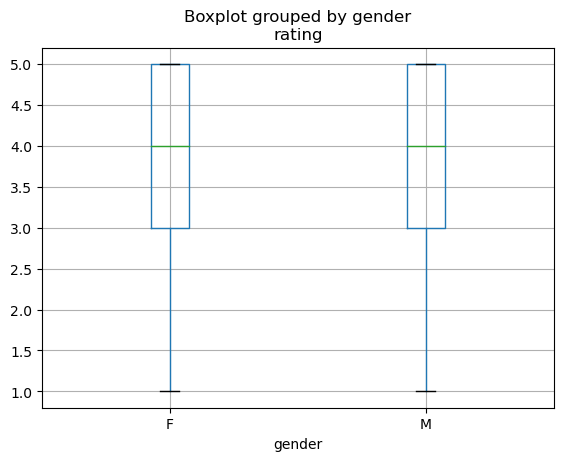

In [18]:
# Boxplot grouped by gender rating 
clean_df.boxplot('rating',by='gender')

#### Summary for the correlation between gender and ratings
- Females and males tend to have a similar ratings. 
- The majority ratings are range from 3.0 to 5.0.
- The lowest ratings in both gender is 1.0 and the highest ratings is 5.0.

<Axes: title={'center': 'rating'}, xlabel='helpfulness'>

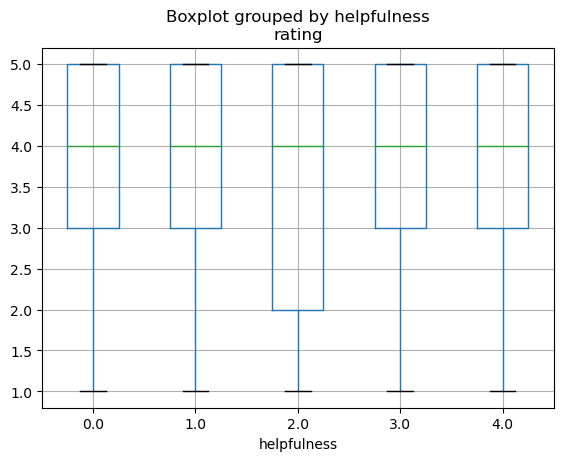

In [19]:
# Boxplot grouped by helpfulness rating 
clean_df.boxplot('rating',by='helpfulness')

#### Summary for the correlation between helpfulness and ratings
- We can see the relationship between a review's helpfulness and the rating it gives: the higher the rating, the higher the helpfulness.
This indicates that there is a positive relationship between ratings and helpfulness.



(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

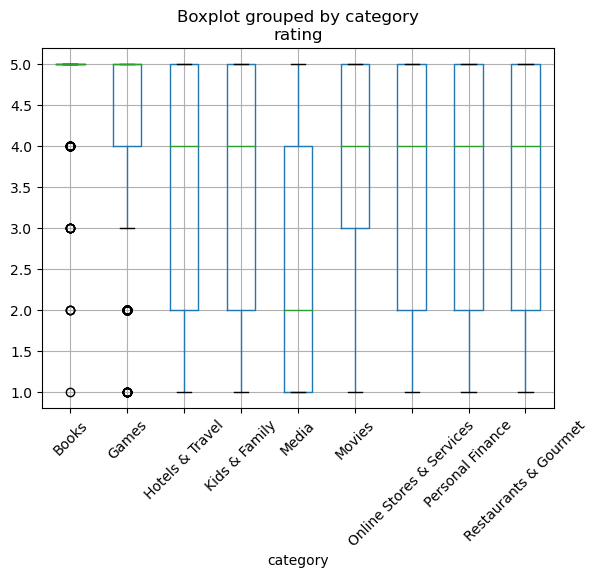

In [35]:
# Boxplot grouped by category rating 
clean_df.boxplot('rating',by='category')
plt.xticks(rotation = 45)


#### Summary for the correlation between category and ratings
- Lowest rating is 1.0. Highest rating is 5.0 for all 9 of them. 
- Media is the lowest rating category with the majority of rating range from 1.0 to 4.0. 
- In contrast, Books is the highest rating, most of the rating for books are 5.0 except 4 outlier reviews at 4.0, 3.0, 2.0 and 1.0
- Hotels & Travel, Kids & Family, Online Stores & Services, Personal Finance, Restaurants & Gourmet have the same rating pattern, mostly are 2.0 to 5.0 rating.
- Games is the second favourable category with most of ratings at 4.0 to 5.0.

### Conclusion
- Males and females show no different in terms of rating preferences.
- For categories, Books and Games have the highest rating, while Media is lest favourable.
- Helpfulness and Rating tend to have a positive relationship, the higher ther rating, the higher the helpfulness.

#### 4. Detect and remove outliers

In [21]:
# Remove reviews with helpfulness no more than 2
help_drop = clean_df[clean_df['helpfulness'] <= 2].index.tolist()
final_df = clean_df.drop(help_drop)

In [22]:
# Remove users who rate less than 7 items
item_df = final_df.groupby(['userId'])['item'].count()
item_drop = item_df[item_df >= 7].index
final_df = final_df[final_df['userId'].isin(item_drop)]


In [23]:
# Remove items that receive less than 11 ratings
rating_df = final_df.groupby(['item'])['rating'].count()
rating_drop = rating_df[rating_df >= 11].index
final_df = final_df[final_df['item'].isin(rating_drop)]

In [24]:
# Print the length of the cleaned data
final_df.to_csv('The E-commerce Dataset.csv', index=False)
print("the lenghth of the cleaned data:",len(final_df))

the lenghth of the cleaned data: 2685
